___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# K Nearest Neighbors Project 

Welcome to the KNN Project! This will be a simple project very similar to the lecture, except you'll be given another data set. Go ahead and just follow the directions below.
## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import cufflinks as cf
cf.go_offline()

sns.set_style("whitegrid")
import scipy.stats as stats

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [4]:
data = pd.read_csv('KNN_Project_Data')

**Check the head of the dataframe.**

In [5]:
data.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

In [6]:
data.describe()

XVPM         GWYH         TRAT         TLLZ         IGGA  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   1055.071157   991.851567  1529.373525   495.107156   940.590072   
std     370.980193   392.278890   640.286092   142.789188   345.923136   
min      21.170000    21.720000    31.800000     8.450000    17.930000   
25%     767.413366   694.859326  1062.600806   401.788135   700.763295   
50%    1045.904805   978.355081  1522.507269   500.197421   939.348662   
75%    1326.065178  1275.528770  1991.128626   600.525709  1182.578166   
max    2117.000000  2172.000000  3180.000000   845.000000  1793.000000   

              HYKR         EDFS         GUUB         MGJM         JHZC  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   1550.637455  1561.003252   561.346117  1089.067338  1452.521629   
std     493.491988   598.608517   247.357552   402.666953   568.132005   
min      27.930000    31.960000    13.520000    23.210000    30.890000   
25%    1219.267077  1132.097865   381.704293   801.849802  1059.499689   
50%    1564.996551  1565.882879   540.420379  1099.087954  1441.554053   
75%    1891.937040  1981.739411   725.762027  1369.923665  1864.405512   
max    2793.000000  3196.000000  1352.000000  2321.000000  3089.000000   

       TARGET CLASS  
count    1000.00000  
mean        0.50000  
std         0.50025  
min         0.00000  
25%         0.00000  
50%         0.50000  
75%         1.00000  
max         1.00000

# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

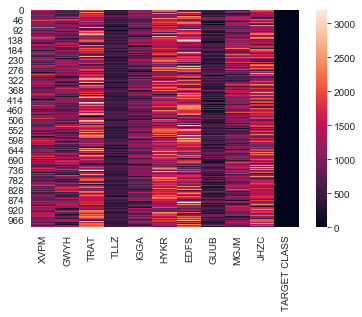

In [10]:
sns.heatmap(data)

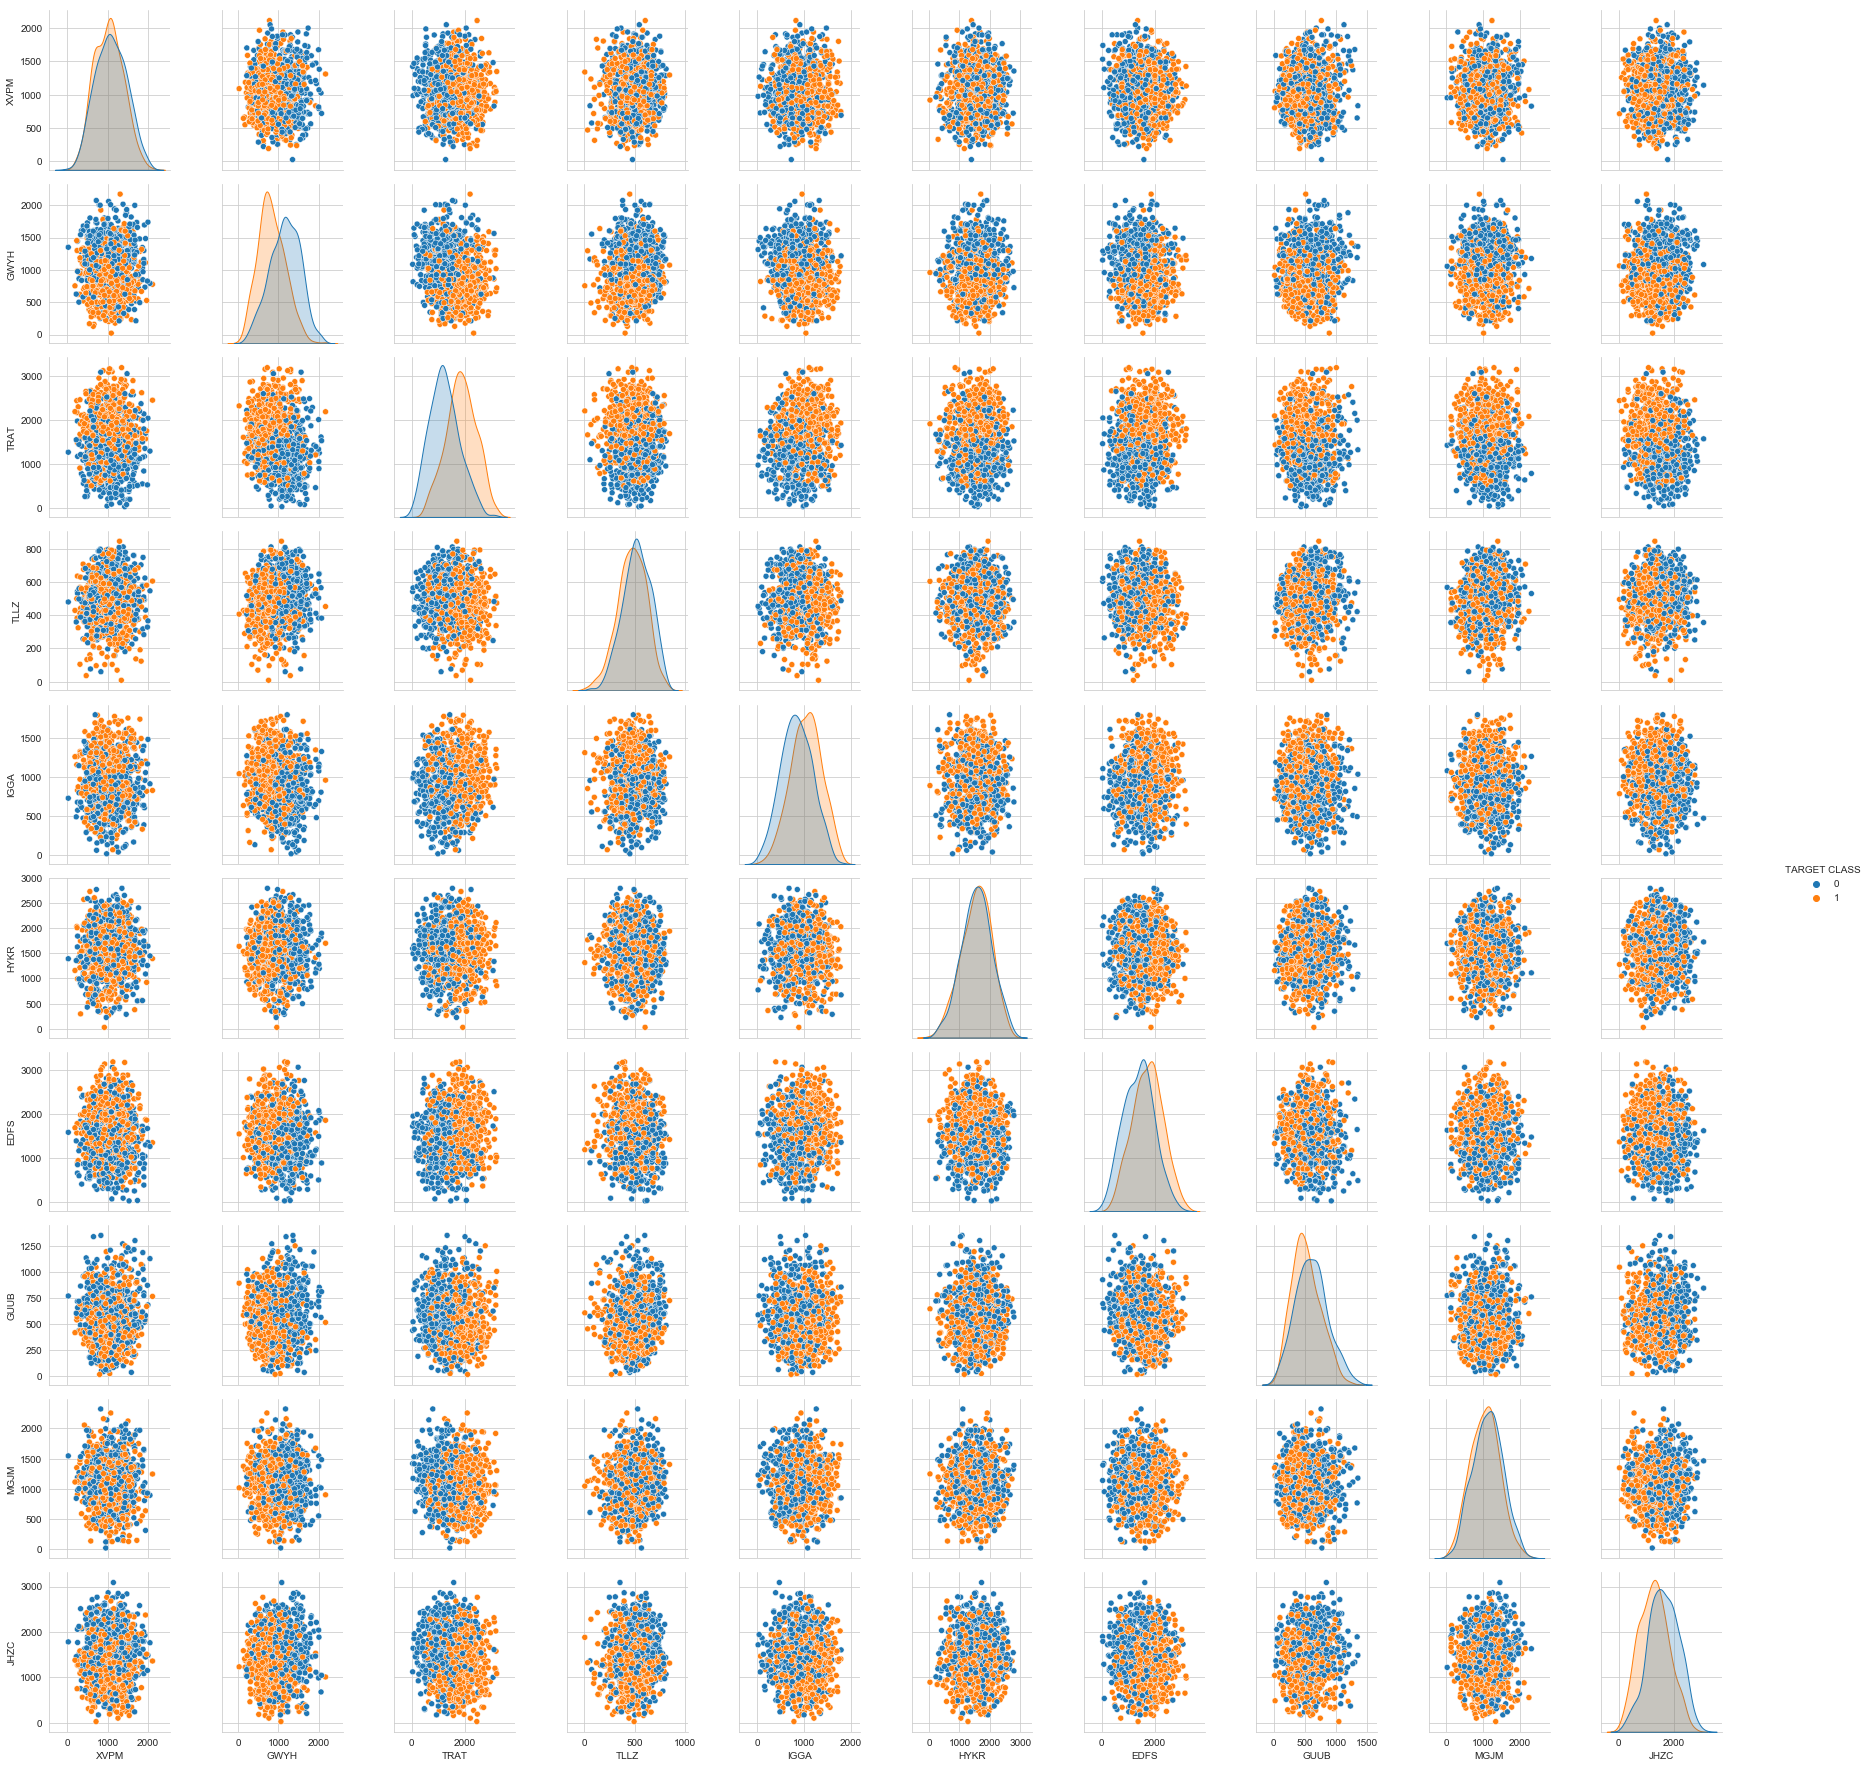

In [12]:
sns.pairplot(data, hue = 'TARGET CLASS' )

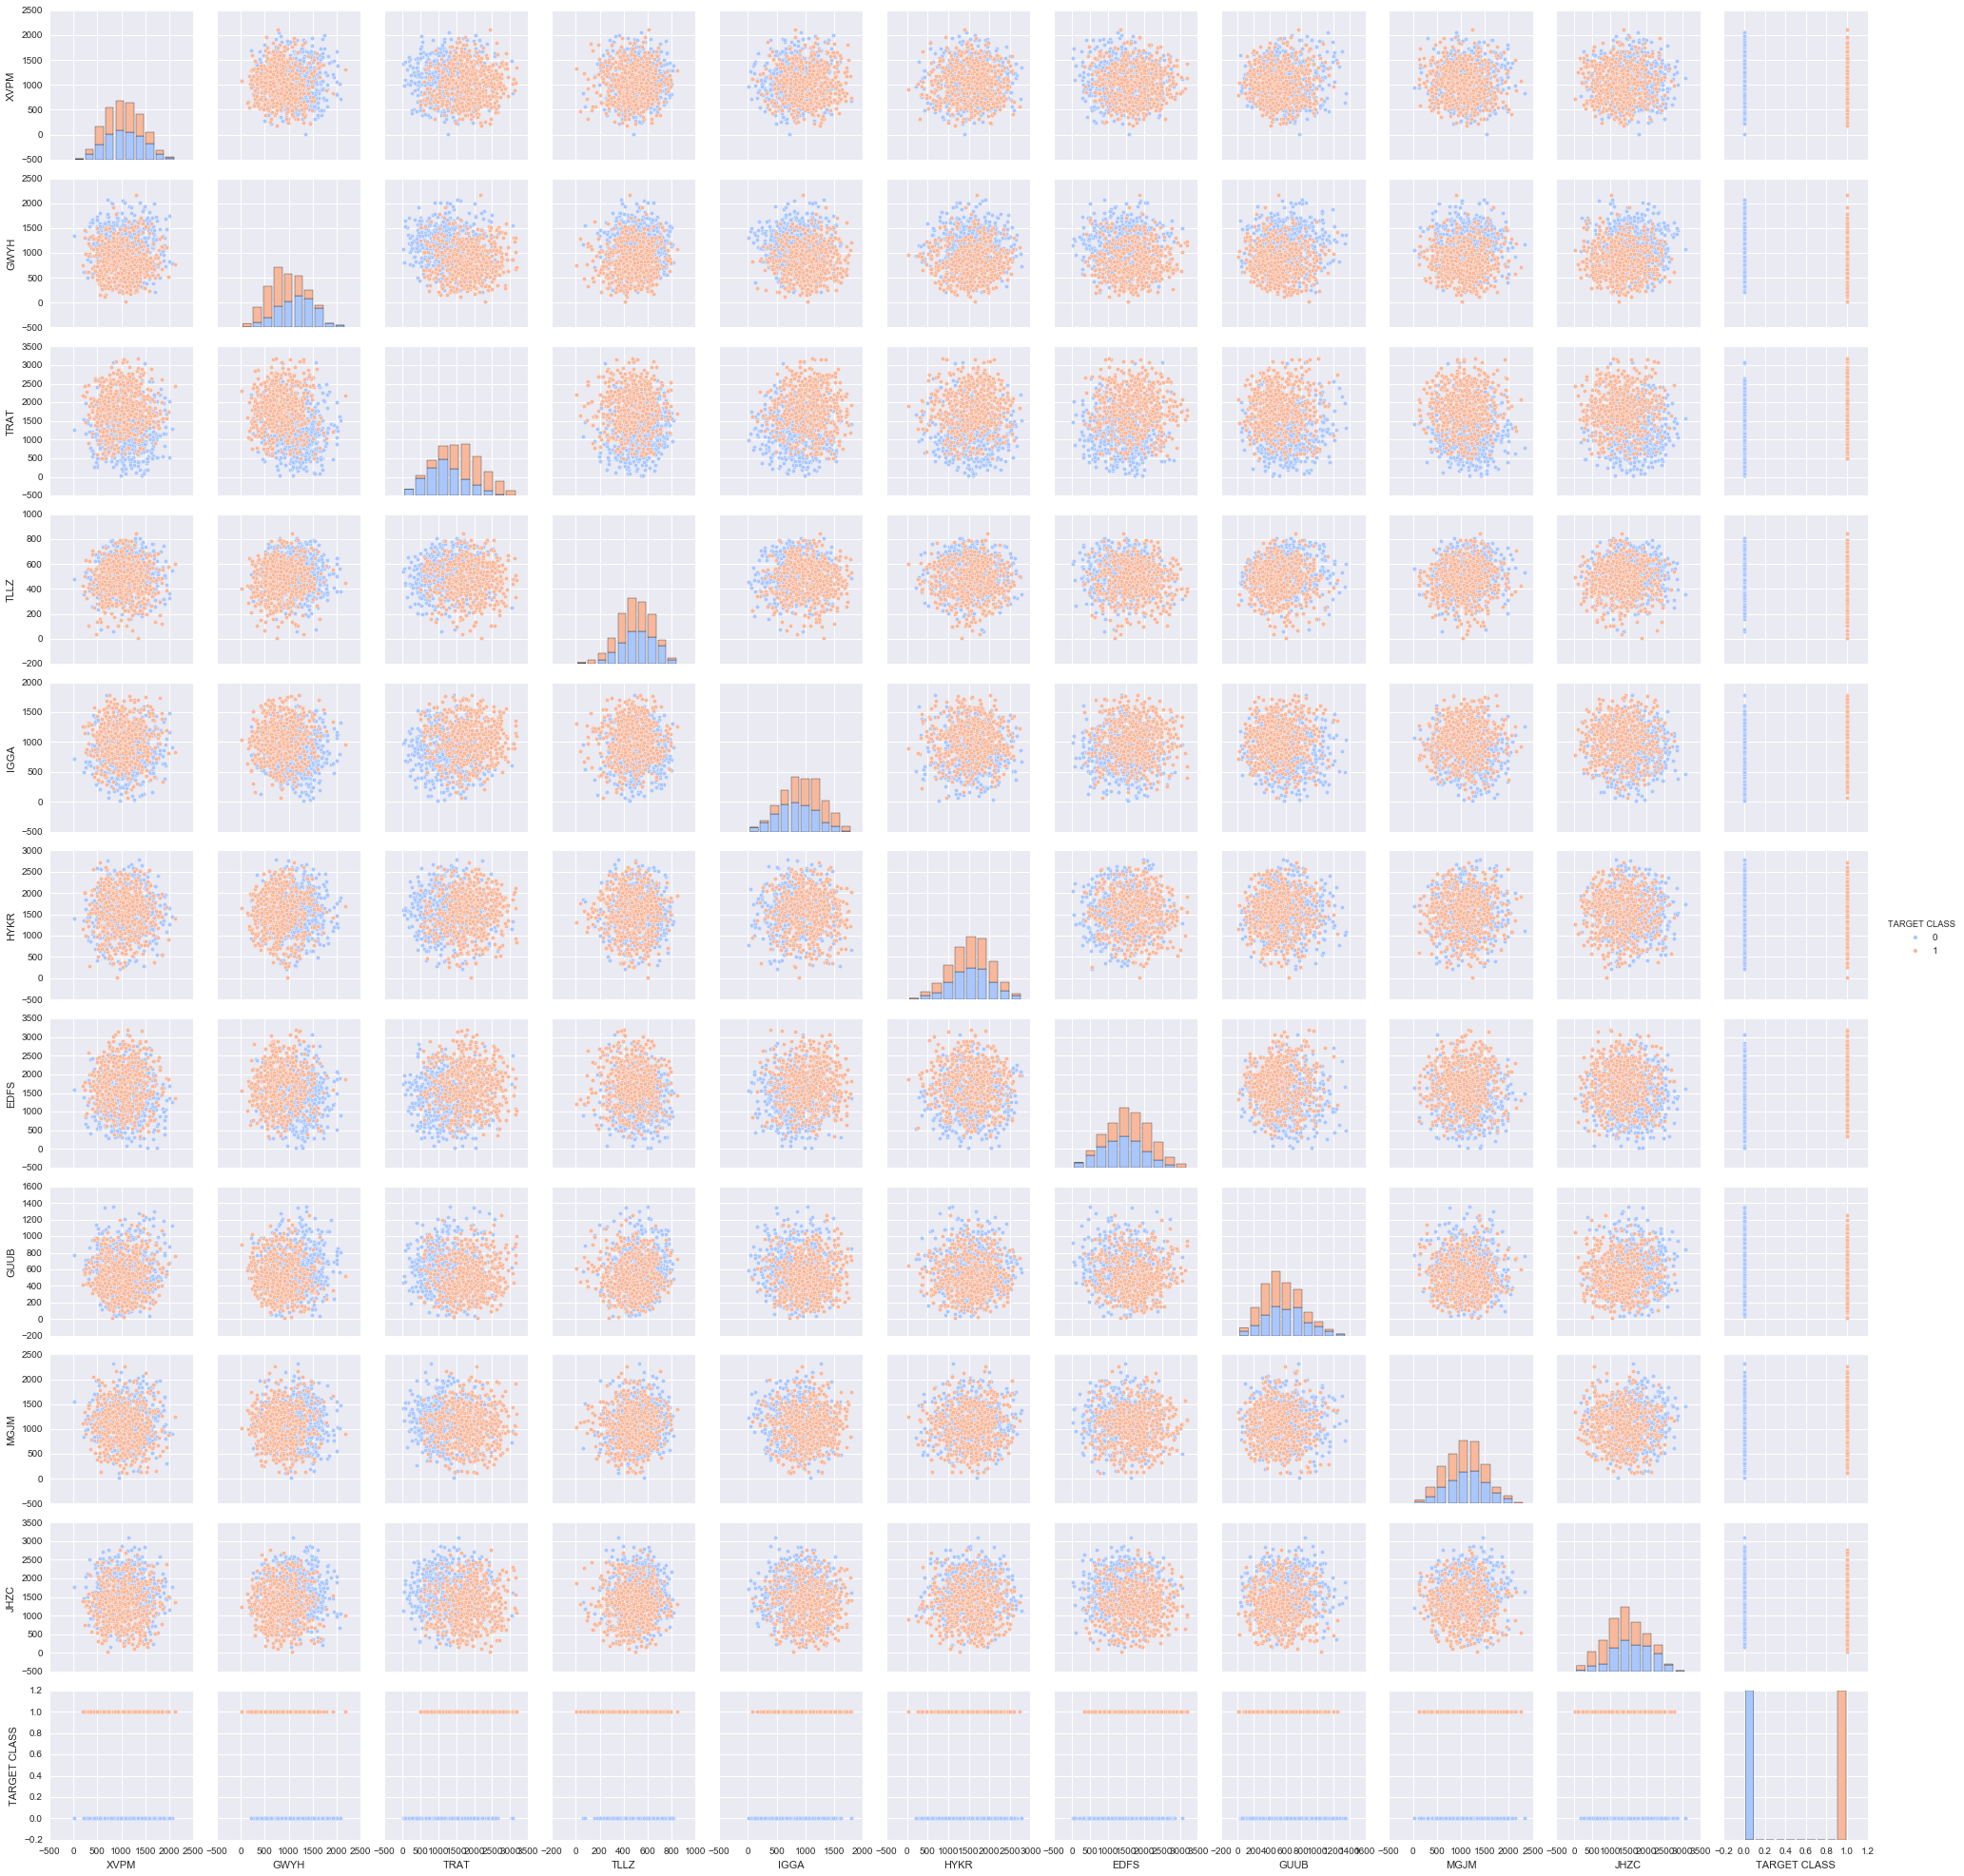

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [13]:
from sklearn.preprocessing import StandardScaler

** Create a StandardScaler() object called scaler.**

In [14]:
scaler = StandardScaler()

** Fit scaler to the features.**

In [16]:
scaler.fit(data.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**

In [17]:
scaled_features = scaler.transform(data.drop('TARGET CLASS',axis=1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [18]:
df_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1])
df_feat.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,data['TARGET CLASS'],
                                                    test_size=0.30)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [22]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [23]:
knn = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [24]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [25]:
pred = knn.predict(X_test)

** Create a confusion matrix and classification report.**

In [26]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[110  36]
 [ 35 119]]


[[112  40]
 [ 34 114]]


             precision    recall  f1-score   support

          0       0.77      0.74      0.75       152
          1       0.74      0.77      0.75       148

avg / total       0.75      0.75      0.75       300



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [27]:
error_rate = []

# Will take some time
for i in range(1,60):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [28]:
import cufflinks as cf
cf.go_offline()

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
  
# to get the connection 
init_notebook_mode(connected = True) 
  
# plotly also serves online, 
# but we are using just a sample 
cf.go_offline 

<function cufflinks.offline.go_offline(connected=None)>

In [29]:
df = pd.DataFrame(error_rate)
df.iplot()

**Now create the following plot using the information from your for loop.**

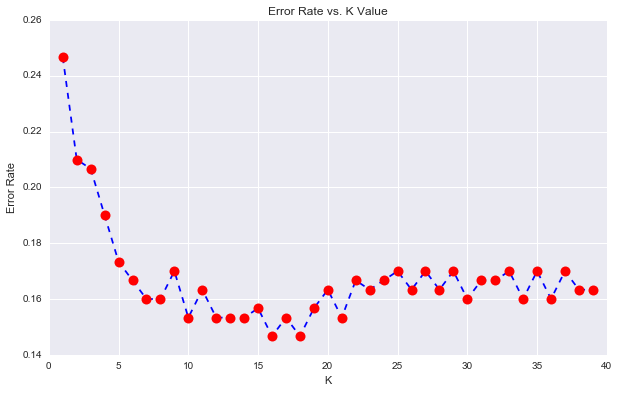

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [30]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[110  36]
 [ 35 119]]


             precision    recall  f1-score   support

          0       0.76      0.75      0.76       146
          1       0.77      0.77      0.77       154

avg / total       0.76      0.76      0.76       300



In [31]:
# NOW WITH K=30
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[121  25]
 [ 23 131]]


             precision    recall  f1-score   support

          0       0.84      0.83      0.83       146
          1       0.84      0.85      0.85       154

avg / total       0.84      0.84      0.84       300



WITH K=30


[[127  25]
 [ 23 125]]


             precision    recall  f1-score   support

          0       0.85      0.84      0.84       152
          1       0.83      0.84      0.84       148

avg / total       0.84      0.84      0.84       300



# Great Job!